In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve


In [148]:
train_df =  np.load('./X_train_final(bs).npy')
test_df =  np.load('./X_test_final(bs).npy')
train_df1 =  np.load('./X_train_final.npy')
test_df1 =  np.load('./X_test_final.npy')

In [117]:
train_df.shape

(5440, 210)

In [118]:
test_df.shape

(3400, 210)

In [119]:
train_labels = pd.read_csv('./TrainLabels.csv')
true_labels = pd.read_csv('./true_labels.csv')
submission = pd.read_csv('./SampleSubmission.csv')

In [120]:
Y_train = train_labels.Prediction.values

In [128]:
#Training and testing sets for the baseline data
x_train1, x_test1, y_train1, y_test1 = train_test_split(train_df, Y_train, test_size=0.2)

In [149]:
#Training and testing sets for the data without the baseline
x_train2, x_test2, y_train2, y_test2 = train_test_split(train_df1, Y_train, test_size=0.2)

In [123]:
#Draw the curve of the best AUC Curve
def plot_roc(test_df,svm_preds):
    svm_roc = roc_auc_score(test_df, svm_preds)
    fpr, tpr, thresholds = roc_curve(test_df,svm_preds)
    plt.plot(fpr, tpr, label='SVM = ( %0.3f)' % svm_roc)
    plt.plot([0, 1], [0, 1],'g--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of SVM')
    plt.legend(loc="lower right")
    plt.show()
    

In [173]:
#Using SVM to find the optimal C in the dataset with baseline
C_list = [0.001,0.01,0.1,10]
auc=0
opt_C = None
#For loop used 
for c in C_list:
    estimator = SVC(kernel = 'linear',max_iter=10000,probability=True)
    parameter = {'kernel':('linear',), 'C':[c]}
    grid_search = GridSearchCV(estimator, parameter, cv=5)
    grid_search.fit(scaler.fit_transform(x_train1), y_train1)
    pred_y = grid_search.predict(scaler.transform(x_test1))
    auc_score = roc_auc_score(y_test1, pred_y)
    print('AUC:'+"{0:.3f}".format(auc_score))
    if auc_score > auc:
        auc = auc_score
        opt_C = c
print('Best parameter C* = ',opt_C)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa

AUC:0.500


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa

AUC:0.500


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa

AUC:0.537


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa

AUC:0.536
Best parameter C* =  0.1


In [171]:
#SVM with dataset without baseline to check for optimal C 
scaler = StandardScaler()
C_list = [0.001,0.01,0.1,10]
auc=[]
auc_s=0
opt_C = None
#For loop used 
for c in C_list:
    estimator = SVC(kernel = 'linear',max_iter=10000,probability=True)
    parameter = {'kernel':('linear',), 'C':[c]}
    grid_search = GridSearchCV(estimator, parameter, cv=5)
    grid_search.fit(scaler.fit_transform(x_train2), y_train2)
    pred_y = grid_search.predict(scaler.transform(x_test2))
    auc_score = roc_auc_score(y_test2, pred_y)
    print('AUC:'+"{0:.3f}".format(auc_score))
    auc.append(auc_score)
    if auc_score > auc_s:
        auc_s = auc_score
        opt_C = c
            
# Obtain the best C from the best linear SVM classifier.
print('Best parameter C* = ',opt_C) 

AUC:0.560


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa

AUC:0.647


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa

AUC:0.636


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa

AUC:0.546
Best parameter C* =  0.01


In [163]:
#predicting probabilities for submission
grid_search_results = grid_search.predict_proba(test_df)[:,1]


array([0.68560985, 0.52339121, 0.82898164, ..., 0.77801642, 0.68160528,
       0.71221464])

In [164]:
df_sub = pd.read_csv('./SampleSubmission.csv')

In [165]:
print(df_sub.shape)
print(grid_search_results.shape)

(3400, 2)
(3400,)


In [166]:
df_sub['Prediction'] = grid_search_results


In [167]:
df_sub.to_csv('sub_4.csv',index=False)

In [174]:
#Fitting with RBF 
scaler = StandardScaler()   #standard scaler to preprocess data 

estimator = SVC(kernel = 'rbf',max_iter=10000)
#Paramater list has varying C values and gamma values 
parameter = {'kernel':('rbf',), 'C':[0.001,0.01,0.1,10],'gamma':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
grid_search = GridSearchCV(estimator, parameter, cv=5)
grid_search.fit(scaler.fit_transform(x_train2), y_train2)
pred_y = grid_search.predict(scaler.transform(x_test2))
auc_score = roc_auc_score(y_test2, pred_y)
print('AUC:'+"{0:.3f}".format(auc_score))

# Obtain the C and gamma  from the best linear SVM classifier.
opt_C = grid_search.best_params_['C']
opt_g = grid_search.best_params_['gamma']
print('Best parameter C*={}, best parameter gamma*={}'.format(opt_C, opt_g))
#plot_roc(pred_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa

AUC:0.629
Best parameter C*=10, best parameter gamma*=0.01


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-pa

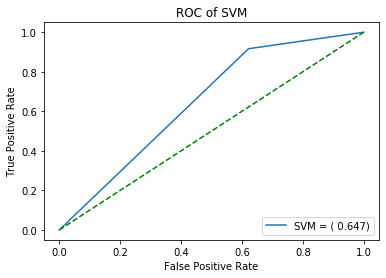

In [160]:
#Drawing ROC curve with the optimal C 
estimator = SVC(kernel = 'linear',max_iter=10000,probability=True)
parameter = {'kernel':('linear',), 'C':[0.01]}
grid_search = GridSearchCV(estimator, parameter, cv=5)
grid_search.fit(scaler.fit_transform(x_train2), y_train2)
pred_y = grid_search.predict(scaler.transform(x_test2))
plot_roc(y_test2, pred_y)

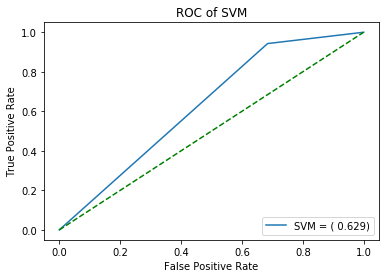

In [183]:
#AUC RBF graph
estimator = SVC(kernel = 'rbf',max_iter=10000)
parameter = {'kernel':('rbf',), 'C':[10],'gamma':[0.01]}
grid_search = GridSearchCV(estimator, parameter, cv=5)
grid_search.fit(scaler.fit_transform(x_train2), y_train2)
pred_y = grid_search.predict(scaler.transform(x_test2))
plot_roc(y_test2, pred_y)

Text(0.5, 1.0, 'SVM using linear kernel')

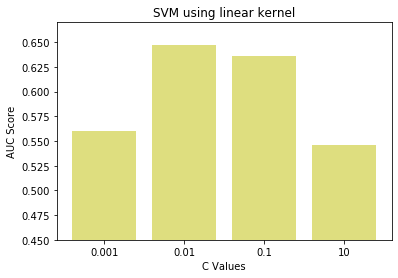

In [177]:
c = ['0.001','0.01','0.1','10']
auc=[0.560,0.647,0.636,0.546]
plt.bar(c,auc,align='center', color='y',alpha=0.5)

plt.ylim(0.4500,0.670)
plt.xlabel('C Values')
plt.ylabel('AUC Score')
plt.title('SVM using linear kernel')

Text(0.5, 1.0, 'SVM using linear kernel (baseline) ')

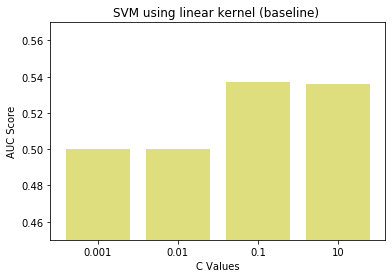

In [181]:
c = ['0.001','0.01','0.1','10']
auc_=[0.500,0.500,0.537,0.536]
plt.bar(c,auc_,align='center', color='y',alpha=0.5)

plt.ylim(0.4500,0.570)
plt.xlabel('C Values')
plt.ylabel('AUC Score')
plt.title('SVM using linear kernel (baseline) ')